In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt 
import geopandas as gpd
import osmnx as ox
import itertools as it
%matplotlib inline

# 1. Street Network from OSM using OSMNx

In [2]:
# Street networks from a geocode location.
jalan_jogja = ox.graph.graph_from_place("Kota Yogyakarta, Indonesia", network_type='drive', simplify=True)

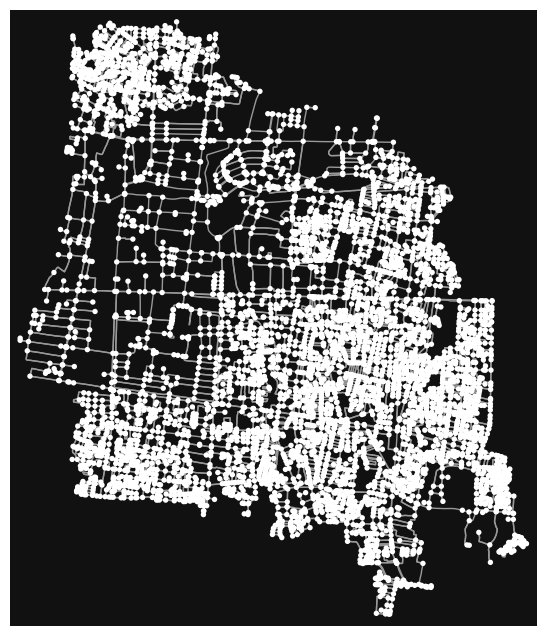

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [95]:
# Visualisation
ox.plot_graph(jalan_jogja)

# 2. Origin Destination

## Inputting OD's Geometry

In [3]:
#Pakualaman is not defined in OpenStreetMap, merging the geometry that constitute Pakualaman.
pakualaman = ["Gunung ketur, Kota Yogyakarta, Indonesia","Bausasran, Kota Yogyakarta, Indonesia",
              "Pakualaman, Kota Yogyakarta, Indonesia", 
              "Batas Wilayah RW 02 Kelurahan Gunungketur, Kota Yogyakarta, Indonesia"]
pakualaman = ox.geocode_to_gdf(pakualaman)
pakualaman = pakualaman.dissolve()
pakualaman = pakualaman.replace("Gunung ketur, Yogyakarta, Special Region of Yogyakarta, Indonesia",
                                "Pakualaman, Yogyakarta, Special Region of Yogyakarta, Indonesia")
display(pakualaman)

geometry  bbox_north  bbox_south  \
0  POLYGON ((110.37750 -7.79732, 110.37749 -7.797...   -7.797324   -7.804723   

    bbox_east   bbox_west   place_id  osm_type   osm_id       lat         lon  \
0  110.380675  110.373041  298368056  relation  5615711 -7.801033  110.378709   

                                        display_name     class  \
0  Pakualaman, Yogyakarta, Special Region of Yogy...  boundary   

             type  importance  
0  administrative        0.77

(427358.0889348225, 434946.5295682836, -867085.2089826264, -858130.7770321547)

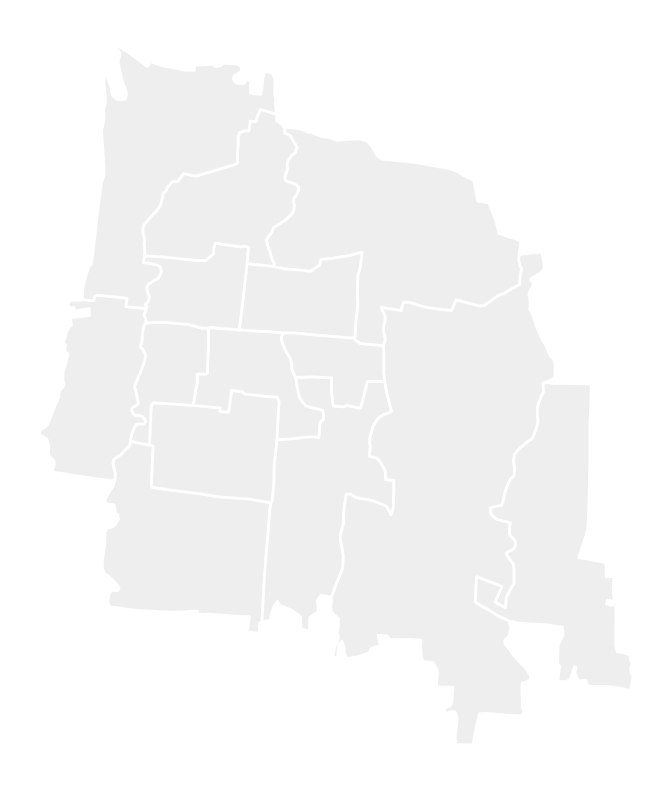

In [4]:
#Other location used as inner OD.
places = ["Mantrijeron, Kota Yogyakarta, Indonesia","Kraton, Kota Yogyakarta, Indonesia",
          "Mergangsan, Kota Yogyakarta, Indonesia","Umbulharjo, Kota Yogyakarta, Indonesia",
          "Kotagede, Kota Yogyakarta, Indonesia","Gondokusuman, Kota Yogyakarta, Indonesia",
          "Danurejan, Kota Yogyakarta, Indonesia", "Gondomanan, Kota Yogyakarta, Indonesia",
          "Ngampilan, Kota Yogyakarta, Indonesia", "Wirobrajan, Kota Yogyakarta, Indonesia",
          "Gedongtengen, Kota Yogyakarta, Indonesia", "Jetis, Kota Yogyakarta, Indonesia",
          "Tegalrejo, Kota Yogyakarta, Indonesia"]

#Polygon of the places.
places = ox.geocode_to_gdf(places)

#Concatenating pakualaman to the data.
places = pd.concat([places.iloc[:7], pakualaman, places.iloc[7:]], ignore_index=True)

places = ox.project_gdf(places)
fig, ax = plt.subplots(figsize=(20, 10))
places.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
ax.axis('off')

In [5]:
places

geometry  bbox_north  bbox_south  \
0   POLYGON ((428430.625 -864609.148, 428443.948 -...   -7.808181   -7.828394   
1   POLYGON ((428979.627 -863191.232, 429023.467 -...   -7.802810   -7.814672   
2   POLYGON ((430290.105 -865224.477, 430301.231 -...   -7.801431   -7.828139   
3   POLYGON ((431087.932 -865069.522, 431090.572 -...   -7.788365   -7.840177   
4   POLYGON ((432769.205 -865013.700, 432852.216 -...   -7.802059   -7.834482   
5   POLYGON ((430338.445 -860804.899, 430349.025 -...   -7.775173   -7.798381   
6   POLYGON ((430022.077 -861852.726, 430034.979 -...   -7.788329   -7.797344   
7   POLYGON ((431366.442 -861942.388, 431365.696 -...   -7.797324   -7.804723   
8   POLYGON ((429488.082 -862729.611, 429570.906 -...   -7.796201   -7.808036   
9   POLYGON ((428756.630 -863146.632, 428890.644 -...   -7.795695   -7.808587   
10  POLYGON ((427703.025 -863056.042, 427711.611 -...   -7.792832   -7.812361   
11  POLYGON ((428910.622 -861071.917, 428922.024 -...   -7.787346   -7.796495   
12  POLYGON ((428902.012 -860667.809, 428904.652 -...   -7.773312   -7.789822   
13  POLYGON ((428192.585 -861494.585, 428225.662 -...   -7.766491   -7.794204   

     bbox_east   bbox_west   place_id  osm_type   osm_id       lat  \
0   110.368682  110.350838  298648438  relation  5615287 -7.818068   
1   110.369540  110.355837  298090170  relation  5615259 -7.808799   
2   110.381610  110.367695  298634048  relation  5615272 -7.814734   
3   110.398656  110.374934  298304383  relation  5615257 -7.814378   
4   110.406793  110.390184  298074913  relation  5615277 -7.818311   
5   110.395134  110.368194  298247106  relation  5615304 -7.786791   
6   110.378294  110.365310  298613848  relation  5615318 -7.792842   
7   110.380675  110.373041  298368056  relation  5615711 -7.801033   
8   110.374193  110.360455  298639993  relation  5615326 -7.802395   
9   110.362104  110.353815  298314418  relation  5615256 -7.802183   
10  110.355548  110.344261  298011899  relation  5615266 -7.802624   
11  110.366329  110.355241  298284923  relation  5615288 -7.791872   
12  110.371609  110.355168  298692136  relation  5615219 -7.781514   
13  110.369314  110.348723  298083290  relation  5615279 -7.780455   

           lon                                       display_name     class  \
0   110.359723  Mantrijeron, Yogyakarta, Special Region of Yog...  boundary   
1   110.362726  Kraton, Yogyakarta, Special Region of Yogyakar...  boundary   
2   110.372558  Mergangsan, Yogyakarta, Special Region of Yogy...  boundary   
3   110.387374  Umbulharjo, Yogyakarta, Special Region of Yogy...  boundary   
4   110.397941  Kotagede, Yogyakarta, Special Region of Yogyak...  boundary   
5   110.381157  Gondokusuman, Yogyakarta, Special Region of Yo...  boundary   
6   110.371795  Danurejan, Yogyakarta, Special Region of Yogya...  boundary   
7   110.378709  Pakualaman, Yogyakarta, Special Region of Yogy...  boundary   
8   110.366112  Gondomanan, Yogyakarta, Special Region of Yogy...  boundary   
9   110.357603  Ngampilan, Yogyakarta, Special Region of Yogya...  boundary   
10  110.350447  Wirobrajan, Yogyakarta, Special Region of Yogy...  boundary   
11  110.360770  Gedongtengen, Yogyakarta, Special Region of Yo...  boundary   
12  110.364669  Jetis, Yogyakarta, Special Region of Yogyakart...  boundary   
13  110.355073  Tegalrejo, Yogyakarta, Special Region of Yogya...  boundary   

              type  importance  
0   administrative    0.730000  
1   administrative    0.590958  
2   administrative    0.730000  
3   administrative    0.730000  
4   administrative    0.830000  
5   administrative    0.587278  
6   administrative    0.575851  
7   administrative    0.770000  
8   administrative    0.575851  
9   administrative    0.574699  
10  administrative    0.730000  
11  administrative    0.572328  
12  administrative    0.620812  
13  administrative    0.730000

Text(0.5, 1.0, 'Titik OD di Kota Yogyakarta')

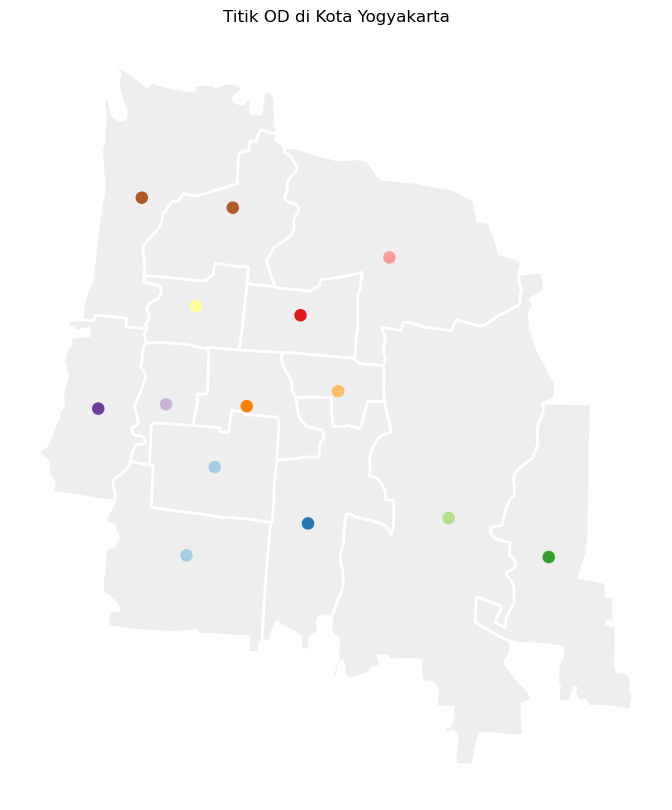

In [6]:
#Centre Point of the OD's polygon.
node_OD = places['geometry'].representative_point()
fig, ax = plt.subplots(figsize=(20, 10))
places.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
node_OD.plot(ax=ax, linewidth=3, alpha=1, cmap="Paired")
ax.axis("off")
ax.set_title("Titik OD di Kota Yogyakarta")

In [7]:
node_OD

0     POINT (429409.473 -864240.163)
1     POINT (429739.193 -863213.434)
2     POINT (430824.107 -863868.687)
3     POINT (432460.072 -863806.409)
4     POINT (433623.124 -864259.946)
5     POINT (431770.234 -860776.253)
6     POINT (430736.497 -861447.869)
7     POINT (431173.462 -862330.384)
8     POINT (430111.643 -862505.440)
9     POINT (429173.235 -862482.926)
10    POINT (428384.421 -862533.483)
11    POINT (429520.852 -861342.383)
12    POINT (429949.168 -860196.847)
13    POINT (428890.868 -860080.432)
dtype: geometry

## Nearest Nodes of each OD

In [8]:
#Finding langitude and latitude from OD's centre point.
X = node_OD.x.values
Y = node_OD.y.values

#Nearest Nodes.
nodes_inner = pd.Series(ox.nearest_nodes(jalan_jogja, X, Y))
display(nodes_inner)
nodes_inner.dtype

0     8448450259
1     8448450259
2     8456592554
3     5618872370
4     2910170208
5     3671121834
6     4554723739
7     7595372034
8     8448450259
9     2910170208
10    8456592554
11    4554723739
12    5618872370
13    5618872370
dtype: int64

dtype('int64')

## Same step, only for outer OD

(311271.23004651885, 531461.0512117816, -914449.9946570757, -748115.8121198618)

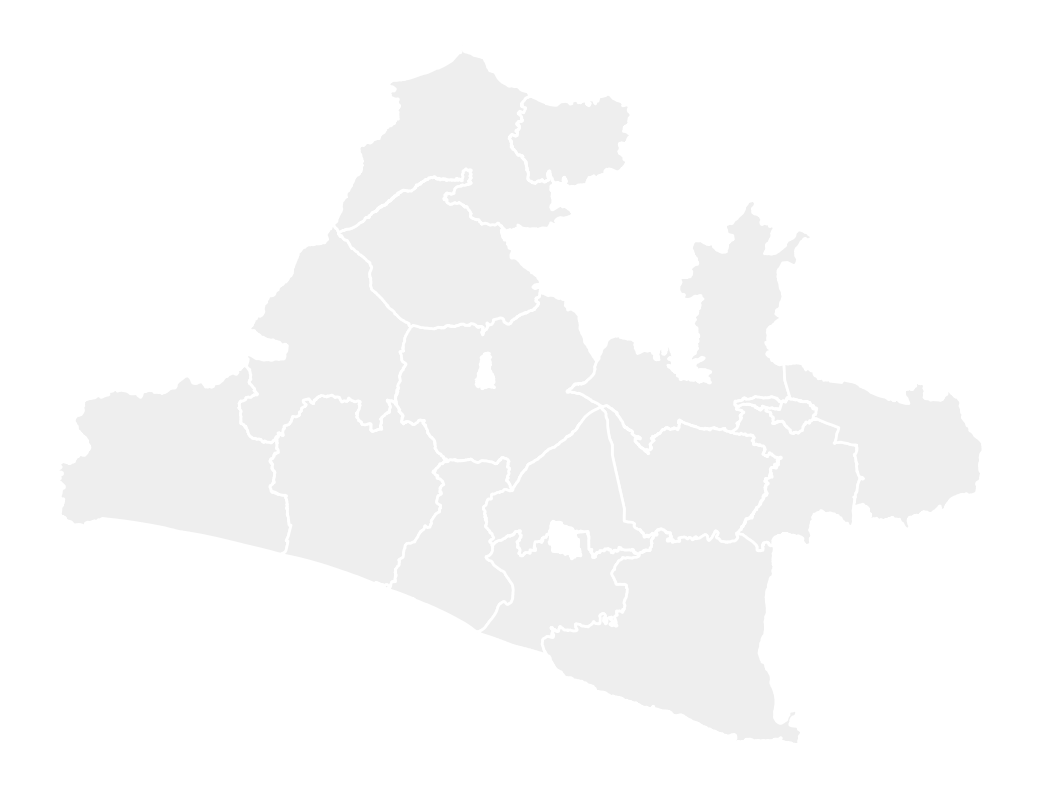

In [9]:
places_outer = ["Kebumen, Jawa Tengah, Indonesia","Purworejo, Jawa Tengah, Indonesia",
          "Wonosobo, Jawa Tengah, Indonesia","Magelang, Jawa Tengah, Indonesia",
          "Boyolali, Jawa Tengah, Indonesia","Klaten, Jawa Tengah, Indonesia",
          "Sukoharjo, Jawa Tengah, Indonesia","Karanganyar, Jawa Tengah, Indonesia",
          "Semarang, Jawa Tengah, Indonesia", "Temanggung, Jawa Tengah, Indonesia",
          "Kendal, Jawa Tengah, Indonesia",
          "Surakarta, Jawa Tengah, Indonesia","Kulon Progo, Daerah Istimewa Yogyakarta, Indonesia",
          "Bantul, Daerah Istimewa Yogyakarta, Indonesia",
          "Kabupaten Gunung Kidul, Daerah Istimewa Yogyakarta, Indonesia",
          "Sleman Regency, Daerah Istimewa Yogyakarta, Indonesia"]

places_outer = ox.geocode_to_gdf(places_outer)

places_outer = ox.project_gdf(places_outer)
fig, ax = plt.subplots(figsize=(20, 10))
places_outer.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
ax.axis('off')

Text(0.5, 1.0, 'Titik OD di Luar Yogyakarta')

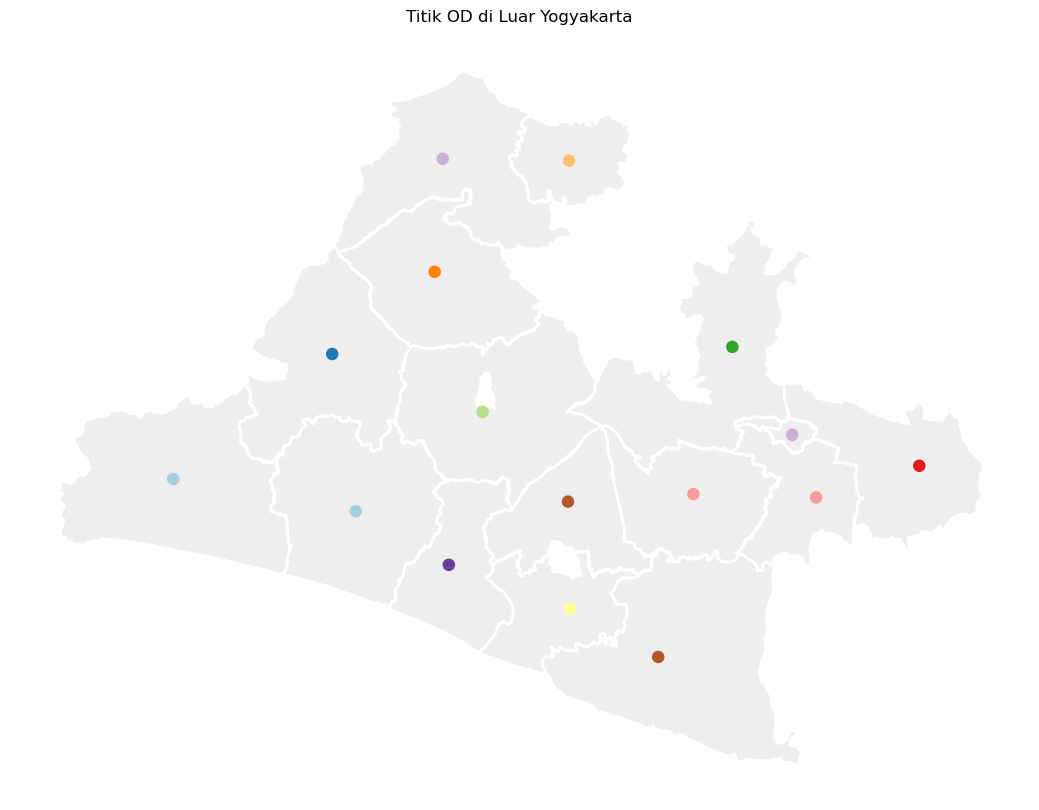

In [10]:
node_OD_outer = places_outer['geometry'].representative_point()
fig, ax = plt.subplots(figsize=(20, 10))
places_outer.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
node_OD_outer.plot(ax=ax, linewidth=3, alpha=1, cmap="Paired")
ax.axis("off")
ax.set_title("Titik OD di Luar Yogyakarta")

In [11]:
node_OD_outer

0     POINT (346527.896 -845135.997)
1     POINT (385941.053 -852075.925)
2     POINT (380869.572 -818107.495)
3     POINT (413341.290 -830588.864)
4     POINT (467315.976 -816565.841)
5     POINT (458891.458 -848366.436)
6     POINT (485400.584 -849095.732)
7     POINT (507697.874 -842255.471)
8     POINT (432043.029 -776346.530)
9     POINT (402995.235 -800349.889)
10    POINT (404752.469 -775952.101)
11    POINT (480251.398 -835573.510)
12    POINT (406072.727 -863644.109)
13    POINT (432272.568 -873101.300)
14    POINT (451288.090 -883551.323)
15    POINT (431806.675 -849999.929)
dtype: geometry

In [11]:
X = node_OD_outer.x.values
Y = node_OD_outer.y.values

nodes_outer = pd.Series(ox.nearest_nodes(jalan_jogja, X, Y))
nodes_outer

0     8456592554
1     8456592554
2     7284040691
3     5618872350
4     5618872350
5     8456592554
6     2910170208
7     3669585656
8     3671121834
9     5618872370
10    5618872358
11    7604492104
12    7604492104
13    5618872358
14    5618872350
15    3671121834
dtype: int64

In [12]:
#Concatenate inner and outer ODs
nodes = pd.concat([nodes_inner, nodes_outer], ignore_index=True)

display(nodes)

0     8448450259
1     8448450259
2     8456592554
3     5618872370
4     2910170208
5     3671121834
6     4554723739
7     7595372034
8     8448450259
9     2910170208
10    8456592554
11    4554723739
12    5618872370
13    5618872370
14    8456592554
15    8456592554
16    7284040691
17    5618872350
18    5618872350
19    8456592554
20    2910170208
21    3669585656
22    3671121834
23    5618872370
24    5618872358
25    7604492104
26    7604492104
27    5618872358
28    5618872350
29    3671121834
dtype: int64

## OD Matrices

In [13]:
OD = pd.read_excel('OD.xlsx',sheet_name='read')

OD

Mantrijeron  Kraton  Mergangsan  Umbulharjo  Kotagede  Gondokusuman  \
0          8164    1141        1628        1438        99           885   
1           426    4554         557        1047       163           752   
2           460     720        7808        2252       522           915   
3          1111     263        1958       20333      2608          3103   
4           263       0         427        3130      9042           786   
5            66     197         491        2087       229         12138   
6            98      98         328         918        33          1144   
7            99      99         131        1077       164           294   
8           197     587         423         719        33           524   
9           261     360         328         752        66           589   
10          686     555         394        1050         0           688   
11          198     132         131         980        66           914   
12          229      66         329         492        66          1435   
13          230      99         329        1372        98          1761   
14            0       0           0           0         0             0   
15            0       0           0          66         0             0   
16            0       0          33           0         0             0   
17           33      33          33          33        33            33   
18            0       0           0           0         0             0   
19            0      33          33          66         0            66   
20            0       0           0          33         0             0   
21            0       0           0           0         0             0   
22           33       0           0           0         0             0   
23            0       0           0          33         0             0   
24           33       0           0           0         0             0   
25           33      33         164         132        66            33   
26           66      33          33         164       230             0   
27         3168    1278        1442        3939      2751          1049   
28           99       0           0         165       165            66   
29         3654    2516        2547        6240      3166          6007   

    Danurejan  Pakualaman  Gondomanan  Ngampilan  ...  Sukoharjo  Karanganyar  \
0         262         132        1531        361  ...          0            0   
1         230          33        1205        457  ...          0            0   
2         719         651        1725        196  ...          0            0   
3        1178        1370        1534        197  ...         33            0   
4         131          99         359        163  ...          0            0   
5        1665         521         523         98  ...          0            0   
6        4294         393         588         66  ...         33            0   
7         717        1692         326         33  ...          0            0   
8         262         262        2506        458  ...          0            0   
9         164           0        1333       2960  ...          0            0   
10        294           0         880        751  ...          0           33   
11        456          33        1724        295  ...          0            0   
12        295           0         523        197  ...          0            0   
13        360          66         946        132  ...          0            0   
14          0           0           0          0  ...          0            0   
15          0           0           0          0  ...          0            0   
16          0           0           0          0  ...          0            0   
17          0          33           0         33  ...          0            0   
18          0           0           0          0  ...          0            0   
19          0           0          66          0  ...     

# 3. Speed, Travel Times and Capacity Imputation.

## Speed
The `ox.add_edge_speeds` function add edge speeds (km per hour) to graph as new `speed_kph` edge attributes. Imputes free-flow travel speeds for all edges based on mean `maxspeed` value of edges, per highway type. This mean-imputation can obviously be imprecise, and the caller can override it by passing in `hwy_speeds` and/or `fallback` arguments that correspond to local speed limit standards. See docstring for details.

In [14]:
# impute speed on all edges missing data
jalan_jogja = ox.add_edge_speeds(jalan_jogja)

Kecepatan dapat ditentukan berdasarkan tipe jalan yang ada di openstreetmap

## Travel Times

In [15]:
# calculate travel time (seconds) for all edges
jalan_jogja = ox.add_edge_travel_times(jalan_jogja)

## Lane dan Widths

### Lanes

In [16]:
def add_edge_lanes(G, lanes_min=1):
    """
    Add default lanes towards NaN lanes value in edge attributes.
    It also change lanes column type into numeric.
    
    By default, this imputes 1 lane toward existing NaN values.
    
    Parameters
    ----------
    G : networkX.MultiDiGraph
        input graph
    lanes_min : int
        assigning minimum values to be inserted.
    """
    #Check if lanes_min is integer
    if not isinstance(lanes_min, int):
        raise TypeError(
            (
                "lanes_min type must be an integer."
            )
        )
    
    edges = ox.utils_graph.graph_to_gdfs(G, nodes=False, fill_edge_geometry=False)
    
    #Change all list values in lanes colum into maximum value of lanes
    #in that list.
    edges["lanes"] = [int(max(x)) if isinstance(x, list) else x for x in edges['lanes']]
    
    #Impute missing values with lanes value.
    lanes = (
        edges[["highway", "lanes"]].set_index("highway").iloc[:, 0].fillna(lanes_min)
    )
    edges["lanes"] = lanes.values
    
    #Change lanes column into numeric
    edges['lanes']=pd.to_numeric(edges['lanes'])
    nx.set_edge_attributes(G, values=edges["lanes"], name="lanes")
    
    return G

In [17]:
jalan_jogja = add_edge_lanes(jalan_jogja)

### Width

In [18]:
def add_edge_width(G, width_min=3.5):
    """
    Add default width towards NaN width value in edge attributes.
    
    By default, this imputes 3.5 meters toward existing NaN values.
    
    Parameters
    ----------
    G : networkX.MultiDiGraph
        input graph
    width_min : int
        assigning minimum values to be inserted.
    """
    #Check if width_min is float
    if not isinstance(width_min, (float,int)):
        raise TypeError(
            (
                "width_min type must be an integer or float."
            )
        )
    
    edges = ox.utils_graph.graph_to_gdfs(G, nodes=False, fill_edge_geometry=False)
    
    #Change all list values in lanes colum into maximum value of lanes
    #in that list.
    edges["width"] = [int(max(x)) if isinstance(x, list) else x for x in edges['width']]
    
    #Impute missing values with width value.
    width = (
        edges[["highway", "width"]].set_index("highway").iloc[:, 0].fillna(width_min)
    )
    #Change lanes column into numeric
    edges["width"]=pd.to_numeric(edges["width"])
    edges["width"] = width.values
    nx.set_edge_attributes(G, values=edges["width"], name="width")
    
    return G

In [19]:
jalan_jogja = add_edge_width(jalan_jogja)

## Capacity
Imputing capacity value based on modification of 'ox.add_edge_travel_times()'.
The capacity is based on lane width and lane numbers.
The value used is based on Indonesia's Highway Capacity Manual.
If there is no lane width nor lane numbers, the capacity of the edges is assumed 1650,
the capacity for 1 lane of 3.5m width.

In [20]:
def add_edge_capacity(G, base_capacity=None, fallback=1650):
    """
    Add edge capacity to graph as new "capacity" edge attributes.
    
    By default, this imputes 1650 * number of lane toward existing 
    NaN values.
    
    Parameters
    ----------
    G : networkX.MultiDiGraph
        input graph
    base_capacity : dict
        dict keys = OSM highway types and values = typical capacity
        to assign to edges of that highway type for any edges missing
        capacity data. Any edges with highway type not in `base_capacity` 
        will be assigned the fallback value.
    fallback : numeric
        default capacity value to assign to edges whose highway
        type did not appear in `base_capacity`. Default value is based on
        Indonesian Higway Capacity Manual 1997 (MKJI 1997).
    """
    
    edges = ox.utils_graph.graph_to_gdfs(G, nodes=False, fill_edge_geometry=False)

    # collapse any highway lists (can happen during graph simplification)
    # into string values simply by keeping just the first element of the list
    edges["highway"] = edges["highway"].map(lambda x: x[0] if isinstance(x, list) else x)
    edges["capacity"] = None
    # if user provided base_capacity, use them as default values, otherwise
    # initialize an empty series to populate with fallback values.
    if base_capacity is None:
        capacity_avg = pd.Series(dtype=float).fillna(fallback)
    else:
        capacity_avg = pd.Series(base_capacity).dropna()
    
    # for each highway type that caller did not provide in base_capacity, impute
    # capacity of type by using fallback values
    for cap, group in edges.groupby("highway"):
        if cap not in capacity_avg:
            capacity_avg.loc[cap] = fallback
    
    #Impute missing values with lanes value.
    capacity = (
        edges[["highway", "capacity"]].set_index("highway").iloc[:, 0].fillna(capacity_avg)
    )
    edges["capacity"] = capacity.round(0).values * edges["lanes"]
    nx.set_edge_attributes(G, values=edges["capacity"], name="capacity")
    
    return G

In [21]:
jalan_jogja = add_edge_capacity(jalan_jogja)

## Summary

In [22]:
#Convert networkX graph into GeoDataFrame.
list_jalan = ox.graph_to_gdfs(ox.project_graph(jalan_jogja), nodes=False)

In [23]:
#Flatten the osmid, can happen during simplification.
list_jalan['osmid'] = list_jalan['osmid'].map(lambda x: x[0] if isinstance(x, list) else x)

In [24]:
list_jalan

osmid  oneway                  name  \
u           v           key                                             
262855957   7698514133  0     824465136    True  Jalan Urip Sumoharjo   
            7305115594  0     933729436    True         Jalan Affandi   
7698514133  1264446512  0      24277036    True  Jalan Urip Sumoharjo   
7305115594  1527609746  0     131706631    True         Jalan Affandi   
            7698514133  0     824465135    True  Jalan Urip Sumoharjo   
...                                 ...     ...                   ...   
10076658464 10076658463 0    1101031523   False                  Jawa   
10079030142 10079030141 0    1101371742   False        Mangga Gang II   
10079585805 10079585803 0    1101438037   False          Gang Setyaki   
10088696207 10088696206 0    1102515149   False                   NaN   
10093718312 10093718311 0    1103043963   False            Gang Jambu   

                                  highway reversed   length  speed_kph  \
u           v           key                                              
262855957   7698514133  0         primary    False    8.843       40.0   
            7305115594  0         primary    False    7.396       40.0   
7698514133  1264446512  0         primary    False   48.641       40.0   
7305115594  1527609746  0         primary    False  189.254       40.0   
            7698514133  0         primary    False    9.463       40.0   
...                                   ...      ...      ...        ...   
10076658464 10076658463 0    unclassified     True   48.583       30.0   
10079030142 10079030141 0    unclassified     True   65.285       30.0   
10079585805 10079585803 0    unclassified     True   79.700       30.0   
10088696207 10088696206 0    unclassified     True   43.065       30.0   
10093718312 10093718311 0    unclassified     True   31.859       30.0   

                             travel_time  lanes width  capacity  \
u           v           key                                       
262855957   7698514133  0            0.8      1   3.5      1650   
            7305115594  0            0.7      2     5      3300   
7698514133  1264446512  0            4.4      1   3.5      1650   
7305115594  1527609746  0           17.0      2     5      3300   
            7698514133  0            0.9      1   3.5      1650   
...                                  ...    ...   ...       ...   
10076658464 10076658463 0            5.8      1   3.5      1650   
10079030142 10079030141 0            7.8      1   3.5      1650   
10079585805 10079585803 0            9.6      1   3.5      1650   
10088696207 10088696206 0            5.2      1   3.5      1650   
10093718312 10093718311 0            3.8      1   3.5      1650   

                                                                      geometry  \
u           v           key                                                      
262855957   7698514133  0    LINESTRING (432488.390 -860369.437, 432480.094...   
            7305115594  0    LINESTRING (432488.390 -860369.437, 432488.523...   
7698514133  1264446512  0    LINESTRING (432480.094 -860366.376, 432464.713...   
7305115594  1527609746  0    LINESTRING (432488.523 -860362.085, 432519.084...   
            7698514133  0    LINESTRING (432488.523 -860362.085, 432480.094...   
...                                                                        ...   
10076658464 10076658463 0    LINESTRING (433410.995 -862569.592, 433363.525...   
10079030142 10079030141 0    LINESTRING (434364.599 -865843.929, 434303.532...   
10079585805 10079585803 0    LINESTRING (433976.281 -865312.769, 434022.910...   
10088696207 10088696206 0    LINESTRING (432442.399 -865939.040, 432436.772...   
10093718312 10093718311 0    LINESTRING (432160.351 -865068.008, 432159.390...   

                            junction bridge maxspeed tunnel access  ref  
u           v           key                                              
262855957   7698514133  0        N

In [25]:
list_jalan.to_excel('list_jalan.xlsx')

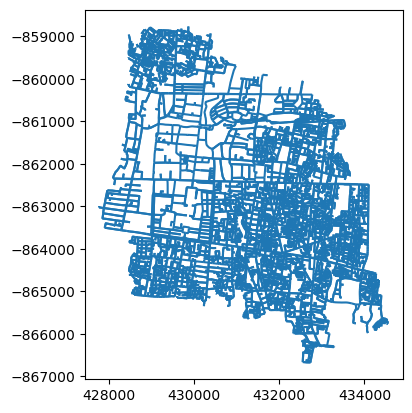

In [117]:
list_jalan.plot()
plt.show()

In [26]:
#Nodes List
list_nodes = ox.graph_to_gdfs(ox.project_graph(jalan_jogja), edges=False)

In [119]:
list_nodes.to_excel('list_nodes.xlsx')

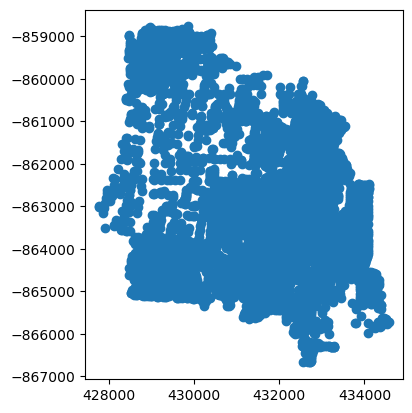

In [120]:
list_nodes.plot()
plt.show()

In [27]:
#Summary of speed, travel time and capacity based on highway type.
list_jalan["highway"] = list_jalan["highway"].astype(str)
list_jalan.groupby("highway")[["lanes","width","length", "speed_kph", "travel_time","capacity"]].mean()

/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1127/1824533698.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  list_jalan.groupby("highway")[["lanes","width","length", "speed_kph", "travel_time","capacity"]].mean()


lanes      length  speed_kph  \
highway                                                             
['living_street', 'residential']  1.040000  137.856800  18.800000   
['primary_link', 'residential']   1.000000  199.732000  40.000000   
['secondary', 'secondary_link']   1.000000   37.464000  54.900000   
['tertiary', 'secondary']         2.000000  520.045000  40.000000   
['unclassified', 'residential']   1.000000   33.976000  30.000000   
living_street                     1.019674   74.070987  18.799550   
primary                           2.453691   80.903240  40.000000   
primary_link                      1.041667   20.175208  40.000000   
residential                       1.046724   66.115897  23.299268   
secondary                         1.788779   74.104391  54.897690   
secondary_link                    1.235294   20.497059  35.300000   
tertiary                          1.475578   59.860066  40.000000   
tertiary_link                     1.000000    8.129692  35.300000   
trunk                             2.000000  131.373200  35.300000   
trunk_link                        1.000000   18.120333  35.300000   
unclassified                      1.272931   67.560962  30.000000   

                                  travel_time     capacity  
highway                                                     
['living_street', 'residential']    26.408000  1716.000000  
['primary_link', 'residential']     18.000000  1650.000000  
['secondary', 'secondary_link']      2.500000  1650.000000  
['tertiary', 'secondary']           46.800000  3300.000000  
['unclassified', 'residential']      4.100000  1650.000000  
living_street                       14.217819  1682.462057  
primary                              7.282148  4048.590604  
primary_link                         1.825000  1718.750000  
residential                         10.219672  1727.095376  
secondary                            4.873185  2951.485149  
secondary_link                       2.082353  2038.235294  
tertiary                             5.386118  2434.704370  
tertiary_link                        0.823077  1650.000000  
trunk                               13.393333  3300.000000  
trunk_link                           1.833333  1650.000000  
unclassified                         8.106264  2100.335570

In [122]:
#Summary of the number of highway based on the highway type.
list_jalan.groupby("highway",dropna=False)[["length", "speed_kph", "travel_time","lanes","width"]].size()

highway
['living_street', 'residential']       50
['primary_link', 'residential']         1
['secondary_link', 'secondary']         1
['tertiary', 'secondary']               1
['unclassified', 'residential']         2
living_street                        1779
primary                               745
primary_link                           24
residential                         10380
secondary                            1212
secondary_link                         17
tertiary                              778
tertiary_link                          26
trunk                                  15
trunk_link                              3
unclassified                          447
dtype: int64

# 4. Shortest Path

## Routing with  OSMNx

### Method 1: Multiprocess Routing

In [28]:
def OD_nodes_list(nodes_OD):
    for index, origin in nodes_OD.items():
        for index, dests in nodes_OD.items():
            yield (origin,dests)

In [32]:
# jalan_jogja.get_edge_data(u, v) -> taking the edge attribute from node u to v

def route_OSMid(k):
    if routes[k] is None:
        return []
    else:
        list_jalan_route = []

        for i in range(len(routes[k])-1):
            jalan = jalan_jogja.get_edge_data(routes[k][i], routes[k][i+1])
            # print(jalan[0]['osmid'])
            list_jalan_route.append(jalan[0]['osmid'])

        return list_jalan_route

In [34]:
def OD_shortest_path(G, nodes_OD):
    nodes = pd.DataFrame(list(OD_nodes_list(nodes_OD)))
    routes = ox.shortest_path(G, nodes.iloc[:,0], nodes.iloc[:,1], weight="travel_time", cpus=None)
    list_jalan_allroutes = []
    for i in range(len(routes)):
        list_jalan_allroutes.append(route_OSMid(i))
    return list_jalan_allroutes

In [35]:
%%time
routes = OD_shortest_path(jalan_jogja, nodes)

CPU times: user 9.19 s, sys: 315 ms, total: 9.5 s
Wall time: 20.6 s


In [36]:
#Sanity check
routes

[[],
 [],
 [361741808,
  326316449,
  326316449,
  326316449,
  326316449,
  326316449,
  665733617,
  665733617,
  665733617,
  665733617,
  323933100,
  821427149,
  323932425,
  324932426,
  [324932426, 323932426],
  493551210,
  208914367,
  208914367,
  208914367,
  208914367,
  208914367,
  208914367,
  208914367,
  955526091,
  362506322,
  362506322,
  326316513,
  588901958,
  615729429,
  [326490211, 326490212, 326490213],
  326490212,
  326490212,
  [588517288, 588517289],
  588517284,
  588517296,
  [588517282, 588517285],
  588517285,
  326490206,
  326490206,
  588517286,
  615729419,
  615729419,
  615729419,
  588514128,
  363848890,
  363848890,
  363848890,
  363848880,
  588514129,
  326490208,
  326490208,
  326490208,
  326490208,
  561138348,
  910728454],
 [361741808,
  361750063,
  361750063,
  361750063,
  361750063,
  361750063,
  [361749873, 361749875, 179906364],
  361749873,
  361749873,
  361749873,
  361749873,
  361749873,
  361749873,
  361749873,
  199

### Method 2 (alternatives, ignore for now.): Looping single OD pair.

In [34]:
def OD_shortest_path3(G, nodes_OD):
    node_i = len(nodes_OD)
    for orig in range(node_i):
        for dest in range(node_i):
            routes = ox.shortest_path(G, nodes_OD[orig], nodes_OD[dest], weight="travel_time", cpus=None)
            yield routes

In [35]:
def OD_shortest_path2(G, nodes_OD):
    for origin in range(len(nodes_OD)):
        for dests in range(len(nodes_OD)):
            routes = ox.shortest_path(G, nodes_OD[origin], nodes_OD[dests], weight="travel_time", cpus=None)
            yield routes

In [36]:
%%time
routes2 = list(OD_shortest_path2(jalan_jogja, nodes))

CPU times: user 15.1 s, sys: 381 ms, total: 15.5 s
Wall time: 16.4 s


In [37]:
%%time
routes3 = list(OD_shortest_path3(jalan_jogja, nodes))

CPU times: user 15.1 s, sys: 148 ms, total: 15.2 s
Wall time: 16.3 s


In [30]:
# how many total results did we get
print(len(routes))

# and how many were solvable paths
# some will be unsolvable due to directed graph perimeter effects
routes_valid = [r for r in routes if r is not None]
print(len(routes_valid))

900
711


# 5. Maximum Entropy Matrix Estimation

## Maximum Entropy Matrix Estimation

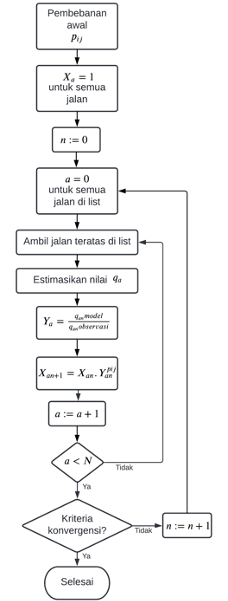

In [ ]:
def ME2(OD):
    n = 0
    if ...:
        
    else:
        n += 1

In [35]:
def calculate_mape(actual, predicted) -> float:
  
    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), 
        np.array(predicted)
  
    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)

In [36]:
#Convergence criteria.
def isConvergenceME2(model, observed, percentage=5):
    if calculate_mape(model, observed) >= percentage:
        return True
    else:
        return False

In [37]:
#Data Test drive
actual    = np.array([136, 120, 138, 155, 149])
predicted = np.array([134, 124, 132, 141, 149])

In [38]:
#Test drive
isConvergenceME2(actual, predicted)

False

# 6. User Equilibrium

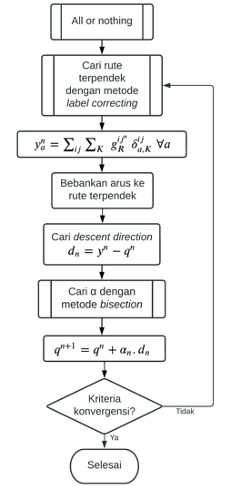

### Tidying OD matrices

#### Method 1: Pandas manipulation

In [31]:
OD = pd.read_excel('OD.xlsx',sheet_name='read')
OD.columns = list(range(1,len(OD.index)+1))

In [32]:
def Flow_from_OD(OD):
    OD.index += 1
    OD.columns = list(range(1,len(OD.index)+1))
    if not len(OD.index) == len(OD.columns):
        raise IndexError(
            (
                "The number of origin and destination must be the same."
            )
        )
    for origin in range(1,len(OD.index)+1):
        for dests in range(1,len(OD.columns)+1):
            if origin == dests:
                yield origin,dests,0
            else:
                flow = OD.iloc[origin-1 ,OD.columns.get_loc(dests)]
                yield origin,dests,flow              

In [33]:
%%time
#Test!
flow = pd.DataFrame(list(Flow_from_OD(pd.read_excel('OD.xlsx',sheet_name='read'))))

CPU times: user 112 ms, sys: 7.26 ms, total: 119 ms
Wall time: 128 ms


#### Using structured numpy array.

In [34]:
%%time
#using numpy structured array
flow = np.fromiter(Flow_from_OD(pd.read_excel('OD.xlsx',sheet_name='read')), 
                   dtype=[('origin','int64'),('dests','int64'),('flow','int64')])

CPU times: user 109 ms, sys: 5.47 ms, total: 115 ms
Wall time: 122 ms


### Accessing Shortest Path's Path List

In [35]:
arus = flow['flow']

In [36]:
def flatten(xs,y):
    for x in xs:
        if isinstance(x,list):
            yield from flatten(x,y)
        else:
            yield [x,int(y)]

In [37]:
#Temporary list for routes.
def listtemp(routes, flow):  
    for x, y in zip(routes,np.nditer(flow)):
        if isinstance(x, list):
            yield from flatten(x,y)
        elif x == None:
            continue
        else:
            yield [x,int(y)]

In [38]:
%%time
templist = list(listtemp(list_jalan_allroutes,arus))
templist = pd.DataFrame(templist,dtype='int64',columns=['osmid','flow'])
templist

CPU times: user 252 ms, sys: 236 ms, total: 488 ms
Wall time: 531 ms


osmid  flow
0      361741808  1628
1      326316449  1628
2      326316449  1628
3      326316449  1628
4      326316449  1628
...          ...   ...
64662  587402638     0
64663  587402638     0
64664  588273206     0
64665  587402615     0
64666  588273201     0

[64667 rows x 2 columns]

In [39]:
#Adding new flow column in edges list.
list_jalan['flow']=np.nan
list_jalan['flow']

u            v            key
262855957    7698514133   0     NaN
             7305115594   0     NaN
7698514133   1264446512   0     NaN
7305115594   1527609746   0     NaN
             7698514133   0     NaN
                                 ..
10076658464  10076658463  0     NaN
10079030142  10079030141  0     NaN
10079585805  10079585803  0     NaN
10088696207  10088696206  0     NaN
10093718312  10093718311  0     NaN
Name: flow, Length: 15481, dtype: float64

In [40]:
%%time
aggtemplist = templist.groupby(['osmid']).sum().squeeze()
display(aggtemplist)
type(aggtemplist)

osmid
24277044        329
24277046        230
24795476      51798
24884718       1974
25006119         99
              ...  
1096212696    12315
1096516418    22732
1096516419    38511
1103079708     1504
1103079709     1504
Name: flow, Length: 447, dtype: int64

CPU times: user 11.3 ms, sys: 3.46 ms, total: 14.8 ms
Wall time: 29.1 ms


pandas.core.series.Series

## Inputting Flow

In [158]:
list_jalan_auxiliary = list_jalan.copy()

In [159]:
list_jalan_auxiliary.groupby("osmid").mean()

/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1261/2717304416.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  list_jalan_auxiliary.groupby("osmid").mean()


oneway      length  speed_kph  travel_time  lanes  capacity  flow
osmid                                                                        
24277036       1.0   95.152400       40.0     8.580000    1.0    1650.0   NaN
24277044       1.0    8.966000       40.0     0.800000    1.0    1650.0   NaN
24277046       1.0   78.604000       40.0     7.100000    1.0    1650.0   NaN
24795475       1.0  244.001000       40.0    22.000000    1.0    1650.0   NaN
24795476       0.0  206.041333       40.0    18.533333    2.0    3300.0   NaN
...            ...         ...        ...          ...    ...       ...   ...
1103801107     0.0   56.905000       30.0     6.800000    1.0    1650.0   NaN
1104600319     0.0  106.905000       30.0    12.800000    1.0    1650.0   NaN
1104602816     0.0   54.791000       30.0     6.600000    1.0    1650.0   NaN
1106548173     0.0   41.213000       23.3     6.400000    1.0    1650.0   NaN
1106599479     0.0   18.086000       23.3     2.800000    1.0    1650.0   NaN

[4052 rows x 7 columns]

In [160]:
%%time
# imputing each osm id not included in shortest path with NaN
for osmid, group in list_jalan_auxiliary.groupby("osmid"):
    if osmid not in aggtemplist:
        aggtemplist.loc[osmid] = np.nan
aruss = (
        list_jalan_auxiliary[["osmid", "flow"]].set_index("osmid").iloc[:, 0].fillna(aggtemplist).fillna(0)
        )
list_jalan_auxiliary['flow'] = aruss.values
list_jalan_auxiliary['flow'].count()

CPU times: user 7.96 s, sys: 97.8 ms, total: 8.06 s
Wall time: 8.2 s


15481

In [126]:
list_jalan_auxiliary['flow']

u            v            key
262855957    7698514133   0      0.0
             7305115594   0      0.0
7698514133   1264446512   0      0.0
7305115594   1527609746   0      0.0
             7698514133   0      0.0
                                ... 
10076658464  10076658463  0      0.0
10079030142  10079030141  0      0.0
10079585805  10079585803  0      0.0
10088696207  10088696206  0      0.0
10093718312  10093718311  0      0.0
Name: flow, Length: 15481, dtype: float64

In [127]:
aux2 = list_jalan_auxiliary.copy()

### Updating Travel Time

## Link Performance Function MKJI 1997

In [128]:
#Sanity check
aux2['travel_time'].sum()

152222.0

In [129]:
#This is a link performance function derived from Indonesia's Highway Manual (MKJI 1997).
def lpr_idn(row):
    if np.isnan(row['flow']):
        return row['travel_time']
    else:
        try:
            return 1/row['speed_kph']*3600/1000*(1+0.79*(row['flow']/row['capacity'])**3.24)
        except ValueError:
            return row['travel_time']

In [130]:
#Update travel time based on Link Performance Function from MKJI 1997
aux2['travel_time']= aux2.apply(lambda x: lpr_idn(x), axis=1)

In [131]:
#Sanity check is all of travel time update is filled
aux2['travel_time'].count()

15481

In [132]:
#sanity check that travel time update is different that travel time before
aux2['travel_time'].sum()

481884335.85120267

In [133]:
list_jalan['travel_time'].sum()

152222.0

## Bisection Method (untested)

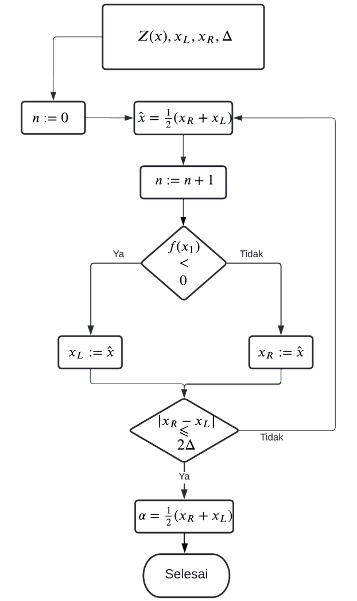

In [170]:
def line_search(row,a):
    return (row['y']-row['q'])*row['t']*(row['q']+a*(row['y']-row['q']))

In [168]:
def f(q,y,t,a):
    df = pd.DataFrame({'q': q, 'y': y, 't':t}).apply(lambda row: line_search(row,a) , axis=1).sum()
    return df

In [98]:
def bisection(qn,yn,ta,xl=0,xr=1, delta=0.01):
    n=0
    condition = True
    while condition:
        n += 1
        x = (xl+xr)/2
        if f(qn,yn,ta,x)<0:
            xl = x
        else:
            xr = x
        condition = abs(xr-xl) <= 2*delta
    return (xr+xl)/2

### Input

In [134]:
t = aux2['travel_time']
x = aux2['flow']

Get Y

In [149]:
#update edges to dummy graph
dummy_jogja = jalan_jogja
nx.set_edge_attributes(dummy_jogja, values=aux2["travel_time"],name='travel_time')
#sanity check
dummy_jalan = ox.graph_to_gdfs(ox.project_graph(dummy_jogja), nodes=False)
dummy_jalan['travel_time'].sum()

481884335.85120267

In [150]:
%%time
routes = OD_shortest_path(dummy_jogja, nodes)

CPU times: user 9.34 s, sys: 453 ms, total: 9.79 s
Wall time: 24.3 s


In [151]:
%%time
#allroutes but instead of using node id, here we use edge id
list_jalan_allroutes = []

for i in range(len(routes)):
    list_jalan_allroutes.append(route_OSMid(i))

list_jalan_allroutes

CPU times: user 86.8 ms, sys: 4.86 ms, total: 91.6 ms
Wall time: 97.2 ms


[[],
 [],
 [361741808,
  326316449,
  326316449,
  912291074,
  725371331,
  324655689,
  [911102972, 912700645],
  665733617,
  1087420735,
  725371345,
  725371345,
  367379937,
  367379938,
  544448934,
  [208916464, 588525550],
  208916464,
  208916458,
  [588533228, 588525549],
  [588525552, 208915195, 588525551],
  588525546,
  217374791,
  217374791,
  955526091,
  955526091,
  217373728,
  217373728,
  217373728,
  [217373728, 397414911],
  725371312,
  725371312,
  208913868,
  589104326,
  589104324,
  589104324,
  326316507,
  [203072108, 326316507, 326316508],
  203072108,
  203072108,
  203072108,
  203072108,
  203072108,
  323932007,
  323932007,
  323932007,
  588906840,
  [588606602, 588513130],
  588513130,
  588513130,
  588513130,
  [588517282, 588517290, 588517276],
  [588517282, 588517285],
  588517285,
  326490206,
  326490206,
  588517295,
  588517294,
  941663775,
  [588517278, 588517279],
  615729419,
  615729419,
  588514128,
  363848890,
  588514130,
  36384

In [152]:
%%time
templist = list(listtemp(list_jalan_allroutes,arus))
templist = pd.DataFrame(templist,dtype='int64',columns=['osmid','flow'])
templist

CPU times: user 140 ms, sys: 52.5 ms, total: 193 ms
Wall time: 255 ms


osmid  flow
0      361741808  1628
1      326316449  1628
2      326316449  1628
3      912291074  1628
4      725371331  1628
...          ...   ...
95598  587402640     0
95599  587402640     0
95600  588273161     0
95601  588273162     0
95602  588273203     0

[95603 rows x 2 columns]

In [153]:
#Adding new flow column in edges list.
dummy_jalan['flow']=np.nan
dummy_jalan['flow']

u            v            key
262855957    7698514133   0     NaN
             7305115594   0     NaN
7698514133   1264446512   0     NaN
7305115594   1527609746   0     NaN
             7698514133   0     NaN
                                 ..
10076658464  10076658463  0     NaN
10079030142  10079030141  0     NaN
10079585805  10079585803  0     NaN
10088696207  10088696206  0     NaN
10093718312  10093718311  0     NaN
Name: flow, Length: 15481, dtype: float64

In [154]:
%%time
aggtemplist = templist.groupby(['osmid']).sum().squeeze()
display(aggtemplist)
type(aggtemplist)

osmid
24795610      10998
25006119       4157
25006122       1380
25006154      26075
25006156       4157
              ...  
1096212689    59248
1096212691    26075
1102755811    15402
1103079708    59248
1103079709    59248
Name: flow, Length: 482, dtype: int64

CPU times: user 12.9 ms, sys: 7.3 ms, total: 20.2 ms
Wall time: 19.9 ms


pandas.core.series.Series

In [155]:
list_jalan_auxiliary = dummy_jalan.copy()

In [161]:
list_jalan_auxiliary.groupby("osmid").mean()

/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1261/2717304416.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  list_jalan_auxiliary.groupby("osmid").mean()


oneway      length  speed_kph  travel_time  lanes  capacity  flow
osmid                                                                        
24277036       1.0   95.152400       40.0     8.580000    1.0    1650.0   0.0
24277044       1.0    8.966000       40.0     0.800000    1.0    1650.0   0.0
24277046       1.0   78.604000       40.0     7.100000    1.0    1650.0   0.0
24795475       1.0  244.001000       40.0    22.000000    1.0    1650.0   0.0
24795476       0.0  206.041333       40.0    18.533333    2.0    3300.0   0.0
...            ...         ...        ...          ...    ...       ...   ...
1103801107     0.0   56.905000       30.0     6.800000    1.0    1650.0   0.0
1104600319     0.0  106.905000       30.0    12.800000    1.0    1650.0   0.0
1104602816     0.0   54.791000       30.0     6.600000    1.0    1650.0   0.0
1106548173     0.0   41.213000       23.3     6.400000    1.0    1650.0   0.0
1106599479     0.0   18.086000       23.3     2.800000    1.0    1650.0   0.0

[4052 rows x 7 columns]

In [162]:
%%time
# imputing each osm id not included in shortest path with NaN
for osmid, group in list_jalan_auxiliary.groupby("osmid"):
    if osmid not in aggtemplist:
        aggtemplist.loc[osmid] = np.nan
aruss = (
        list_jalan_auxiliary[["osmid", "flow"]].set_index("osmid").iloc[:, 0].fillna(aggtemplist).fillna(0)
        )
list_jalan_auxiliary['flow'] = aruss.values
list_jalan_auxiliary['flow'].count()

CPU times: user 7.05 s, sys: 145 ms, total: 7.19 s
Wall time: 9.97 s


15481

In [165]:
#sanity check (Done!)
print(aux2['flow'].sum())
list_jalan_auxiliary['flow'].sum()

208882011.0


354063155.0

In [166]:
y = list_jalan_auxiliary['flow']

In [171]:
%%time
bisection_test = bisection(x,y,t)

CPU times: user 568 ms, sys: 14.8 ms, total: 583 ms
Wall time: 603 ms


In [172]:
bisection_test

0.75

# 7. Validation Test

## Method 1: Scalable Quality Value Method

In [52]:
#MGEH
def mgeh(arr_obs, arr_model):
    return np.sqrt(np.square(arr_model-arr_obs)/arr_obs)

#scaling factor
def scaling_factor(arr_obs):
    return np.ma.average(arr_obs)

#normal sqv
def n_sqv(arr_obs, arr_model, arr_corr=1):
    if type(arr_corr) is np.ndarray:
        arr_corr=arr_corr/arr_obs
    return 1/(1+np.sqrt(np.square(arr_model-arr_obs)/
            (np.ma.average(arr_obs)*arr_obs*arr_corr)))



## Method 2: Root Mean Square Error

In [ ]:
def RMSE(actual,predicted):
    MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE

<b>Integration needed </b>

In [24]:
#SQV standard deviation
std_sqv=mgeh(observed,modeled)*np.sqrt(observed)
print(std_sqv)

[0.1 0.6 0.2 0.4 0.8 1.3 0.2 0.1 0.3 0.2]


In [26]:
#Normal standard deviation
std=np.std(observed)
print(std)

2.8722813232690143


In [30]:
#implicit standard deviation - mgeh standard deviation
np.std(observed)-(mgeh(observed,modeled)*np.sqrt(observed))

array([2.77228132, 2.27228132, 2.67228132, 2.47228132, 2.07228132,
       1.57228132, 2.67228132, 2.77228132, 2.57228132, 2.67228132])

In [41]:
#0+
observed_plus=observed+np.maximum(0,np.std(observed)
                      -(mgeh(observed,modeled)*np.sqrt(observed)))
print(observed)

[ 1  2  3  4  5  6  7  8  9 10]


In [45]:
#Margin of Error
def rSamplingErr(arr_obs,z=1.44):
    return z*np.std(arr_obs)/math.sqrt(len(arr_obs)/np.mean(arr_obs)

SyntaxError: invalid syntax (816697539.py, line 4)

In [46]:
rSamplingErr(observed)

0.23780817326729384

In [48]:
observed_Splus=observed_plus*(1+rSamplingErr(observed))
print(observed_Splus)

[ 4.66936065  5.28826474  7.02119618  8.01144272  8.75412763  9.37303171
 11.97242888 13.33401787 14.32426441 15.6858534 ]


In [58]:
#compate modified n_sqv and manually calculate corrected sqv
print(n_sqv(observed, modeled,observed_Splus))

c_sqv=1/(1+np.sqrt(np.square(modeled-observed)/
            (np.ma.average(observed)*observed_Splus)))
print(c_sqv)

[0.98064899 0.89988476 0.9688193  0.94316561 0.89662553 0.8466972
 0.97594622 0.9884576  0.96730603 0.97892137]
[0.98064899 0.89988476 0.9688193  0.94316561 0.89662553 0.8466972
 0.97594622 0.9884576  0.96730603 0.97892137]


# 8. Visualisation

## Desireline